In [1]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [2]:
playstore = pd.read_csv('data/googleplaystore.csv')
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
playstore.drop_duplicates(subset = 'App',inplace=True)

In [4]:
playstore.drop([10472], inplace=True)

In [5]:
playstore.Category = playstore.Category.astype('category')

In [6]:
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(',',""))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace('+',""))
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,1000,Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
playstore.Installs = playstore.Installs.astype('int')

In [8]:
playstore.Installs

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 9659, dtype: int32

In [9]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

In [10]:
playstore.Price = playstore.Price.apply(lambda x: x.replace('$',''))
playstore.Price = playstore.Price.astype(float)

In [11]:
playstore[['Reviews', 'Size', 'Installs']]=playstore[['Reviews', 'Size', 'Installs']].astype(int)

In [12]:
playstore[['Category','App','Reviews','Rating']].sort_values('Reviews',ascending=False)

,Category,App,Reviews,Rating
2544,SOCIAL,Facebook,78158306,4.1
336,COMMUNICATION,WhatsApp Messenger,69119316,4.4
2545,SOCIAL,Instagram,66577313,4.5
335,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847,4.0
1670,GAME,Clash of Clans,44891723,4.6
...,...,...,...,...
6225,SPORTS,BH Bikes GPS Locator,0,NaN
6880,BUSINESS,BV Teknisk App,0,NaN
6153,VIDEO_PLAYERS,BG MUSIC PLAYER - MUSIC PLAYER,0,NaN
8154,PERSONALIZATION,Wallpapers CZ 75 85,0,NaN


In [13]:
playstore.groupby('App').sum().sort_values('Reviews',ascending=False)

,Rating,Reviews,Size,Installs,Price
App,,,,,
Facebook,4.1,78158306,15984089,1000000000,0.0
WhatsApp Messenger,4.4,69119316,11307429,1000000000,0.0
Instagram,4.5,66577313,15984089,1000000000,0.0
Messenger – Text and Video Chat for Free,4.0,56642847,11307429,1000000000,0.0
Clash of Clans,4.6,44891723,98000000,100000000,0.0
...,...,...,...,...,...
Cypress College Library,0.0,0,2100000,100,0.0
Cyborg AX-001,0.0,0,41866609,50,0.0
Kiosque CD,0.0,0,22000000,5,0.0


In [14]:
 df2 = playstore.copy()

    # Statistik
    # Dataframe top_category dibuat untuk menyimpan frekuensi aplikasi untuk setiap Category. 
    # Gunakan crosstab untuk menghitung frekuensi aplikasi di setiap category kemudian gunakan 'Jumlah'
    # sebagai nama kolom dan urutkan nilai frekuensi dari nilai yang paling banyak. Terakhir reset index dari dataframe top_category 
top_category = pd.crosstab(index=df2['Category'],columns='Jumlah',values=df2['App'], aggfunc='count').sort_values('Jumlah',ascending=False).reset_index()
top_category
    # Dictionary stats digunakan untuk menyimpan beberapa data yang digunakan untuk menampilkan nilai di value box dan tabel

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [15]:
df2[['Category','App','Reviews','Rating']].sort_values('Reviews',ascending=False).head(10).reset_index(drop=True)

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316,4.4
2,SOCIAL,Instagram,66577313,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847,4.0
4,GAME,Clash of Clans,44891723,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526,4.7
6,GAME,Subway Surfers,27722264,4.5
7,VIDEO_PLAYERS,YouTube,25655305,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999,4.7
9,GAME,Clash Royale,23133508,4.6


In [16]:
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews              int32
Size                 int32
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [24]:
df2.groupby('Category').agg({'App' : 'count'}).rename({'Category':'Total'}, axis=1).sort_values('App').head()

,App
Category,
BEAUTY,53
COMICS,56
PARENTING,60
ART_AND_DESIGN,64
EVENTS,64


In [55]:
cat_order = df2.groupby('Category').agg({
    'Category' : 'count'
        }).rename({'Category':'Total'}, axis=1).sort_values('Total',ascending=False).head()

In [56]:
cat_order

,Total
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


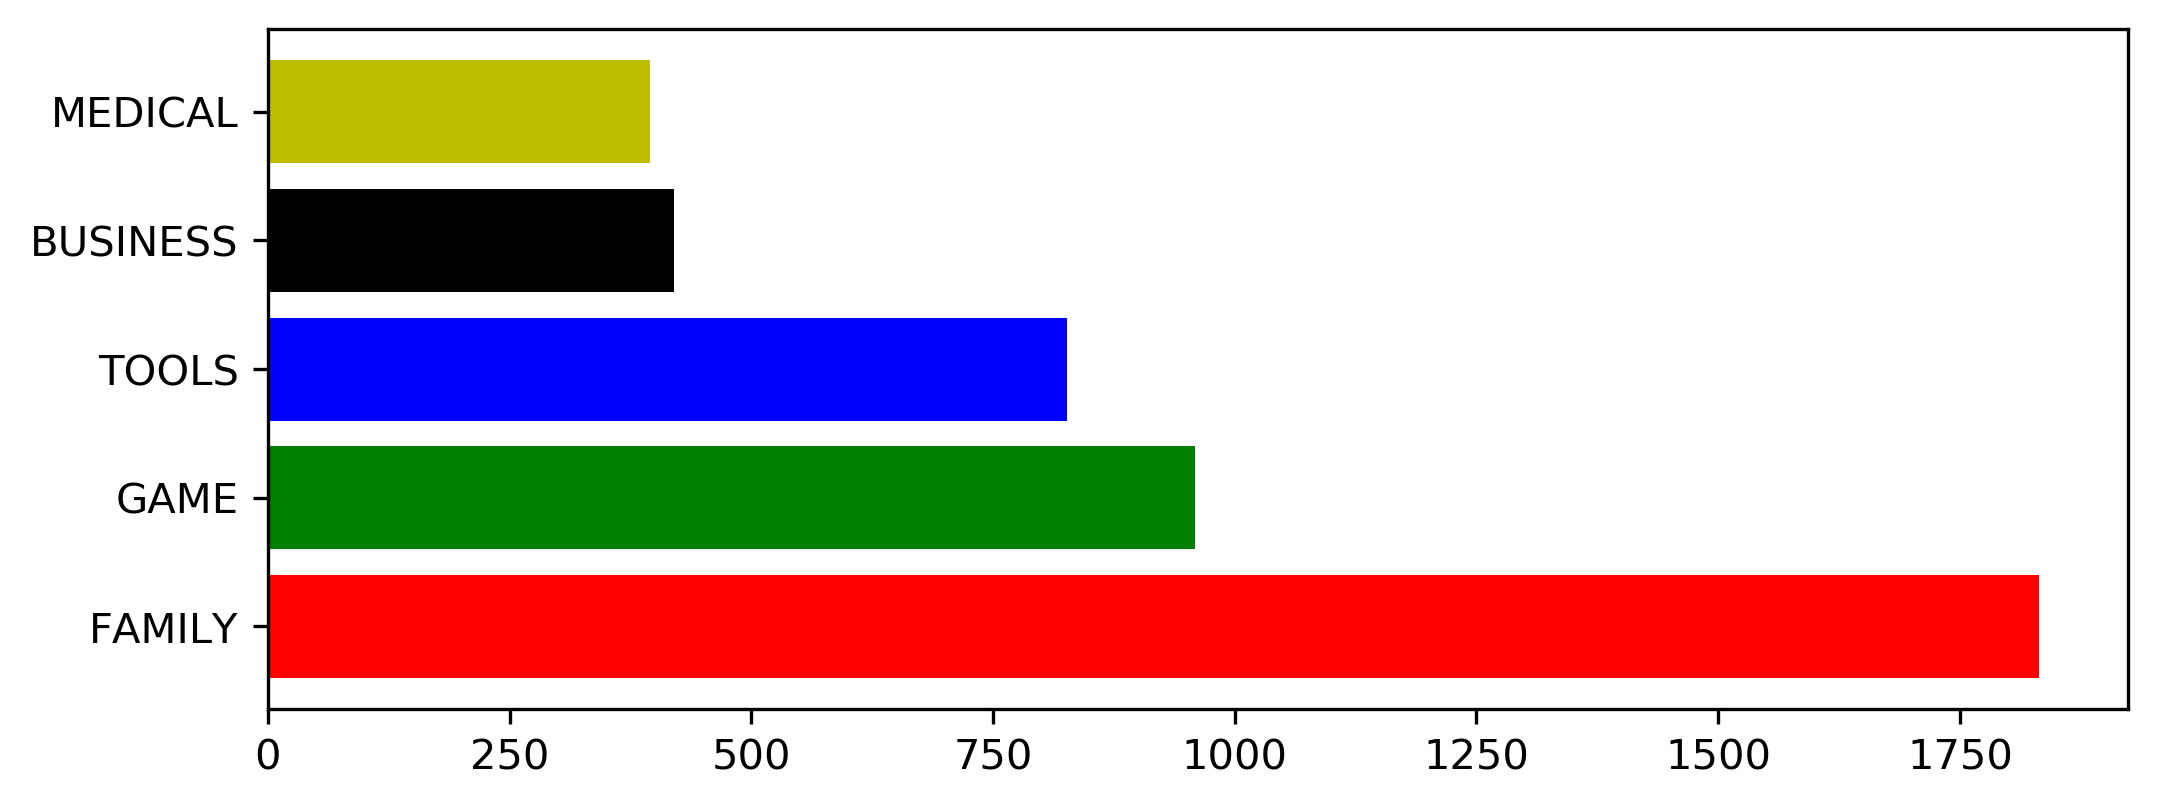

In [61]:
X = cat_order.index
Y = cat_order.Total
my_colors = 'rgbkymc'
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
plt.barh(X,Y, color=my_colors)
    # bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight")

In [62]:
figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
    # variabel result akan dimasukkan ke dalam parameter di fungsi render_template() agar dapat ditampilkan di 
    # halaman html
result = str(figdata_png)[2:-1]

<Figure size 432x288 with 0 Axes>

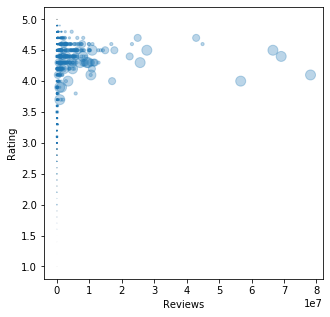

In [63]:
## Scatter Plot
# Buatlah scatter plot untuk menampilkan hubungan dan persebaran apalikasi dilihat dari Review vs Rating.
# Ukuran scatter menggambarkan berapa banyak pengguna yang telah menginstall aplikasi 
X = df2['Reviews'].values # axis x
Y = df2['Rating'].values # axis y
area = playstore['Installs'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
# isi nama method untuk scatter plot, variabel x, dan variabel y
plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")

figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
result2 = str(figdata_png)[2:-1]

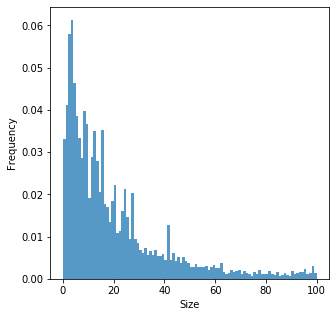

In [64]:
## Histogram Size Distribution
# Buatlah sebuah histogram yang menggambarkan distribusi Size aplikasi dalam satuan Mb(Megabytes) 
# Histogram yang terbentuk terbagi menjadi 100 bins
X=(playstore['Size']/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
result3 = str(figdata_png)[2:-1]

In [75]:
condition_medical = playstore['Category']=="MEDICAL"
medical = playstore[condition_medical].sort_values('Size',ascending=False).head()
medical

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000000,500,Paid,15.99,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up
2349,Teach Me Anatomy,MEDICAL,4.7,9945,97000000,500000,Free,0.00,Everyone,Medical,"July 5, 2018",5.11,4.1 and up
2284,Recognise Foot,MEDICAL,4.2,9,95000000,1000,Paid,7.49,Everyone,Medical,"September 14, 2017",1.0.3,4.1 and up
7900,Radiology CT Viewer,MEDICAL,3.6,35,88000000,10000,Free,0.00,Everyone,Medical,"January 20, 2018",2,4.0 and up
2519,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000000,10000,Free,0.00,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


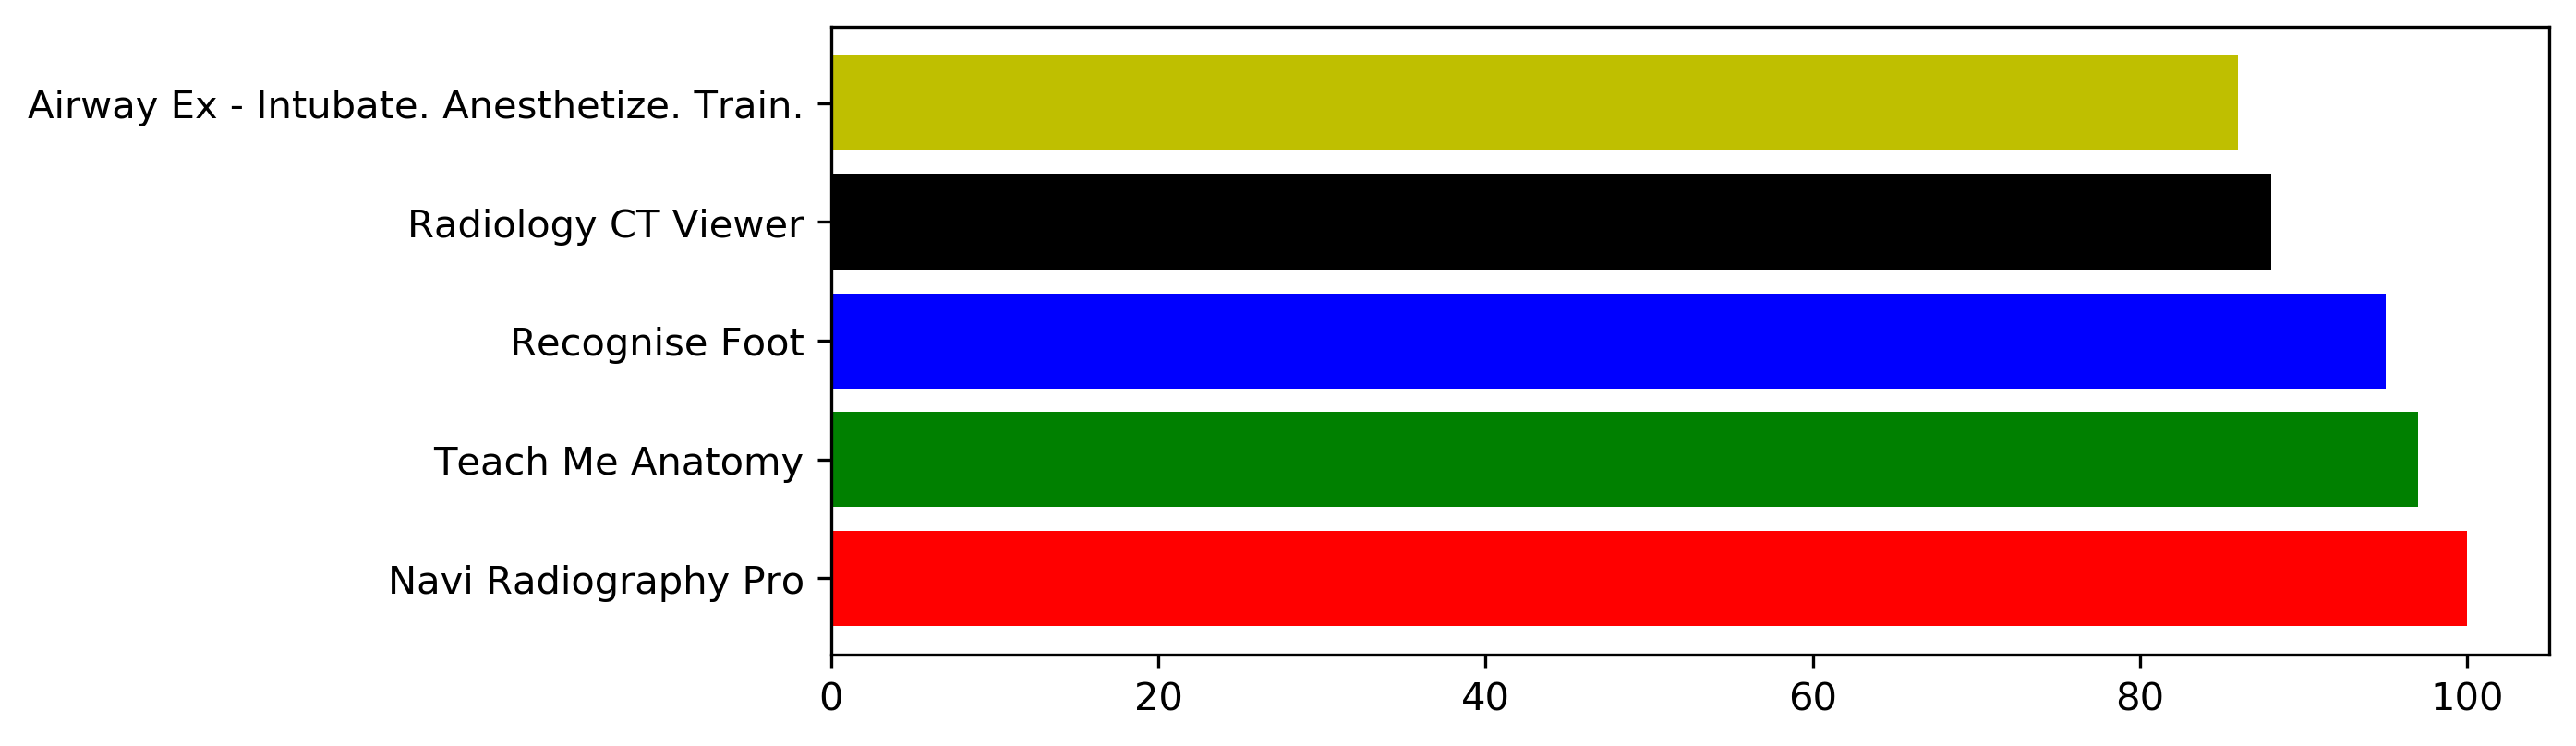

In [77]:
## Buatlah sebuah plot yang menampilkan insight di dalam data 
#Ukuran Size Aplikasi Medical urutkan dari yang paling berat sizenya (dalam MB)
condition_medical = playstore['Category']=="MEDICAL"
medical = playstore[condition_medical].sort_values('Size',ascending=False).head()
X = medical.App
Y = (medical.Size/1000000).values
my_colors = 'rgbkymc'
# bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
# bagian ini digunakan untuk membuat bar plot
# isi variabel x dan y yang telah di definisikan di atas
plt.barh(X,Y, color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight") 

# bagian ini digunakan untuk mengconvert matplotlib png ke base64 agar dapat ditampilkan ke template html
figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
# variabel result akan dimasukkan ke dalam parameter di fungsi render_template() agar dapat ditampilkan di 
# halaman html
result4 = str(figdata_png)[2:-1]